# Deep Learning Training using PCA with CIFAR - 10

## Understanding the Data
Before you go ahead and load the data, it's good to understand and look at the data that you will be working with!

### CIFAR - 10
The CIFAR-10 (Canadian Institute For Advanced Research) dataset consists of 60000 images each of 32x32x3 color images having ten classes, with 6000 images per category.
The dataset consists of 50000 training images and 10000 test images.
The classes in the dataset are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.
You can download the CIFAR dataset from here, or you can also load it on the fly with the help of a deep learning library like Keras.

In [ ]:
from keras.datasets import cifar10
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Traning data shape:', x_train.shape,y_train.shape)
print('Testing data shape:', x_test.shape,y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
Traning data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape: (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


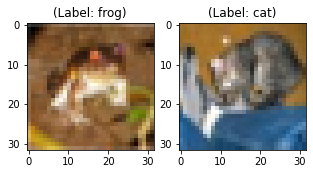

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

First, let's normalize the training and testing images. If you remember the training images were normalized in the PCA visualization part, so you only need to normalize the testing images. So, let's quickly do that!

In [ ]:
np.min(x_train),np.max(x_train)

(0, 255)

In [ ]:
x_train = x_train.astype('float16')
x_train = x_train / 255.0

x_test = x_test.astype('float16')
x_test = x_test/255.0

In [ ]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [ ]:
x_train_flat = x_train.reshape(-1,3072)
x_test_flat = x_test.reshape(-1,3072)

## Speed Up Deep Learning Training using PCA with CIFAR - 10 Dataset


Here, you can also pass how much variance you want PCA to capture. Let's pass 0.95 as a parameter to the PCA model, which means that PCA will hold 90% of the variance and the number of components required to capture 95% variance will be used.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents_cifar = pca.fit(x_train_flat)

Now let's find out how many n_components PCA used to capture 0.95 variance.

In [ ]:
pca.n_components_

217

From the above output, you can observe that to achieve 90% variance, the dimension was reduced to 217 principal components from the actual 3072 dimensions.

Finally, you will apply transform on both the training and test set to generate a transformed dataset from the parameters generated from the fit method.

In [12]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

Next, let's quickly import the necessary libraries to run the deep learning model.

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

Now, you will convert your training and testing labels to one-hot encoding vector.



In [14]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [15]:
# Let's define the number of epochs, number of classes, and the batch size for your model.
batch_size = 128
num_classes = 10
epochs = 20

In [20]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(217,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              223232    
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 1,931,530
Trainable params: 1,931,530
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 2s 4ms/step - loss: 1.7912 - accuracy: 0.3602 - val_loss: 1.4418 - val_accuracy: 0.4825
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 1.3010 - accuracy: 0.5379 - val_loss: 1.3588 - val_accuracy: 0.5245
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 1.0602 - accuracy: 0.6216 - val_loss: 1.3254 - val_accuracy: 0.5449
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.8462 - accuracy: 0.6970 - val_loss: 1.3331 - val_accuracy: 0.5596
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 0.6551 - accuracy: 0.7640 - val_loss: 1.4740 - val_accuracy: 0.5636
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.4992 - accuracy: 0.8236 - val_loss: 1.6968 - val_accuracy: 0.5627
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.3819 - accuracy: 0.8653 - val_loss: 1.8473 - val_accuracy: 0.5372
Epoch 

From the above output, you can observe that the time taken for training each epoch was just 1 seconds on a GPU. The model did a decent job on the training data, achieving 96% accuracy while it achieved only 56% accuracy on the test dat. This means that it overfitted the training data. However, remember that the data was projected to 99 dimensions from 3072 dimensions and despite that it did a great job!

Finally, let's see how much time the model takes to train on the original dataset and how much accuracy it can achieve using the same deep learning model.

In [22]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 2.9355 - accuracy: 0.1808 - val_loss: 1.8509 - val_accuracy: 0.3329
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.8855 - accuracy: 0.3223 - val_loss: 1.7238 - val_accuracy: 0.3797
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.7585 - accuracy: 0.3701 - val_loss: 1.7551 - val_accuracy: 0.3790
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 1.6749 - accuracy: 0.4037 - val_loss: 1.6172 - val_accuracy: 0.4302
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6169 - accuracy: 0.4198 - val_loss: 1.6115 - val_accuracy: 0.4292
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5639 - accuracy: 0.4431 - val_loss: 1.6247 - val_accuracy: 0.4211
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.5237 - accuracy: 0.4578 - val_loss: 1.5168 - val_accuracy: 0.4617
Epoch 

From the above output, it is quite evident that the time taken for training each epoch was around 2 seconds on a CPU which was almost half times more than the model trained on the PCA output.

Moreover, both the training and testing accuracy is less than the accuracy you achieved with the 99 principal components as an input to the model.

So, by applying PCA on the training data you were able to train your deep learning algorithm not only fast, but it also achieved better accuracy on the testing data when compared with the deep learning algorithm trained with original training data.